# Q1What are Recurrent Neural Networks, and how do they differ from traditional feedforward neural networks?
Feedforward Neural Networks (FNNs) and Recurrent Neural Networks (RNNs) are two types of neural networks. FNNs process data in one direction, with each input processed independently. They lack memory, making them less effective for tasks involving sequential data. On the other hand, RNNs are designed to process sequences of data, with their output based on both current and previous inputs. This makes them suitable for tasks like language modeling, machine translation, and speech recognition.

RNNs maintain an internal state updated with each input in the sequence, allowing them to "remember" previous inputs and influence future outputs. Training for FNNs involves backpropagation, while RNNs use backpropagation through time (BPTT), which can lead to challenges like vanishing or exploding gradients.

FNNs are commonly used for tasks with non-sequential input data, such as image classification and object detection, while RNNs are suitable for tasks involving sequences, such as time series prediction and natural language processing.

# Explain the working of RNN, and how information is passed through the network over time.
Recurrent Neural Networks (RNNs) are designed to handle sequential data by maintaining a memory of previous inputs. The key to understanding RNNs lies in how information is passed through the network over time, allowing the model to capture dependencies in sequences. An RNN consists of input nodes, hidden layers (or recurrent layers), and output nodes, similar to a traditional neural network. What distinguishes RNNs is the presence of recurrent connections in the hidden layers, where the output from a previous time step is fed back as input to the current time step.

At each time step, an input is fed into the network, represented as a sequence of data. The hidden state (Memory) is a vector that captures information about all the previous time steps up to that time. It is updated at each time step based on the current input and the previous hidden state.

Output at each time step can be computed based on the current hidden state. The output may be a probability distribution over classes, such as in classification tasks. Information flow over time involves initialization, recurrent updates, and output generation. RNNs are trained using backpropagation through time (BPTT), which is an extension of the standard backpropagation algorithm. One challenge during training is dealing with vanishing or exploding gradients, especially when processing long sequences.

To address this issue, variants like Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRUs) were developed. These architectures introduce gating mechanisms that control the flow of information, enabling the network to maintain memory over longer sequences.


# Q2: Discuss the advantages and potential drawbacks of stacking RNN layers. What are Bi-directional RNNs, and how do they enhance the performance of sequence models?
Stacking multiple RNN layers offers increased capacity and higher-level features, but also increases computational cost and risk of overfitting. Deeper networks are more prone to gradient issues and overfitting, making training challenging. Bi-directional RNNs process input sequences in both forward and backward directions, providing context from both directions and enhanced performance. However, they require more computational resources and memory and are not suitable for real-time tasks or streaming tasks where future context is not yet available. Both approaches have their advantages and drawbacks.

# Explains when and why you would use stacked RNN layers and bi-directional RNNs in a sequence modeling task.
Stacked RNN layers are used in complex tasks like machine translation or video analysis, while bi-directional RNNs are used in tasks requiring full sequence context, like sentiment analysis or speech recognition, to improve model accuracy.

# Q3: What is a hybrid architecture in the context of sequence modeling? Provide examples of how combining RNNs with other deep learning models can enhance performance.
A hybrid architecture in sequence modeling involves combining Recurrent Neural Networks (RNNs) with other deep learning models like Convolutional Neural Networks (CNNs) or Transformers. This combination enhances performance by leveraging their complementary strengths. Examples include CNN-RNN hybrid for image captioning, RNN-Transformer hybrid for machine translation, and RNN with attention mechanism for text summarization. This combination enhances feature extraction and improves sequence modeling by overcoming limitations of RNNs in capturing long-range dependencies.

# Q4: List down types of RNN model and explain their structures and differences with RNN.
Vanilla RNN:
• Single layer RNN model with each neuron having a feedback loop.
• Struggles with learning long-term dependencies due to issues like vanishing or exploding gradients.

Long Short-Term Memory (LSTM):
• Introduces memory cells to maintain information over long periods.
• Addresses the vanishing gradient problem, capturing long-term dependencies more effectively.
• Useful in tasks like language modeling and time series forecasting.

Gated Recurrent Unit (GRU):
• Simpler variant of LSTMs with two gates: reset gate and update gate.
• Computationally more efficient than LSTMs.
• Faster to train and capable of handling long-term dependencies.

Bidirectional RNN (BiRNN):
• Comprises two RNN layers running in parallel.
• Captures context from both past and future within a sequence.
• More effective for tasks where the entire sequence is available.

Deep RNN:
• Multiple RNN layers stacked on top of each other.
• Captures more intricate temporal dynamics and hierarchical structures in the data.
• More prone to issues like vanishing gradients and overfitting.

# Loading Dataset and Preprocessing

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, usecols=[1])

# Display the first few rows
print(df.head())

# Convert the dataframe to a numpy array
data = df.values.astype(float)

# Normalize the data
data_mean = data.mean()
data_std = data.std()
data = (data - data_mean) / data_std

# Create sequences of 12 time steps (1 year) for input
sequence_length = 12
x = []
y = []

for i in range(len(data) - sequence_length):
    x.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])

x = np.array(x)
y = np.array(y)

# Split the data into training and validation sets
split_idx = int(len(x) * 0.8)
x_train, x_val = x[:split_idx], x[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

# Reshape the data for the RNN
x_train = x_train.reshape((x_train.shape[0], sequence_length, 1))
x_val = x_val.reshape((x_val.shape[0], sequence_length, 1))

print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")



   Passengers
0         112
1         118
2         132
3         129
4         121
Training data shape: (105, 12, 1)
Validation data shape: (27, 12, 1)


# Building RNN Model 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Display the model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training Model

In [4]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)


Epoch 1/10

4/4 [==============================] - 1s 72ms/step - loss: 0.4002 - val_loss: 1.7353
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 0.2709 - val_loss: 1.5154
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 0.2030 - val_loss: 1.3086
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.1982 - val_loss: 1.1235
Epoch 5/10
4/4 [==============================] - 0s 10ms/step - loss: 0.1779 - val_loss: 0.9621
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 0.1487 - val_loss: 0.8192
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 0.1343 - val_loss: 0.6859
Epoch 8/10
4/4 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.5751
Epoch 9/10
4/4 [==============================] - 0s 9ms/step - loss: 0.1145 - val_loss: 0.4817
Epoch 10/10
4/4 [==============================] - 0s 10ms/step - loss: 0.1026 - val_loss: 0.4122


# Evaluate and Predict

1/1 [==============================] - 0s 18ms/step - loss: 0.4122
Validation Loss: 0.4121898114681244
1/1 [==============================] - 0s 132ms/step


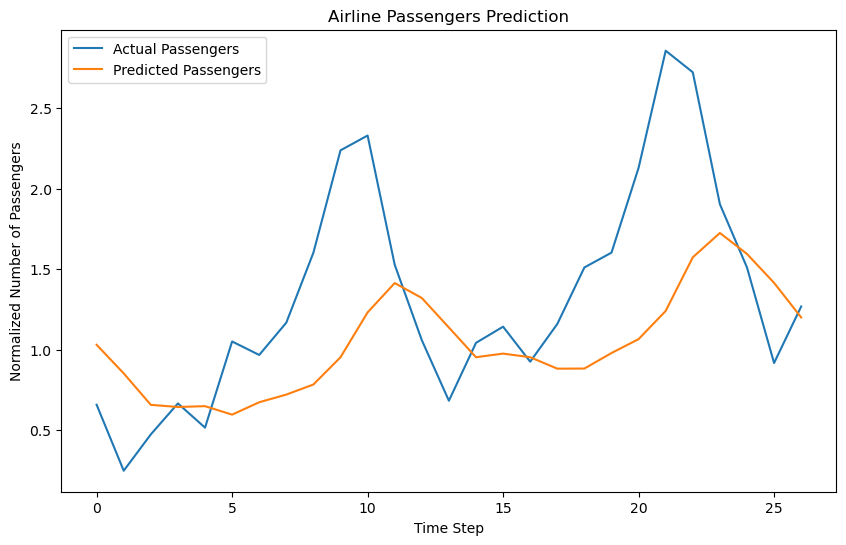

In [5]:
# Evaluate the model on the validation set
val_loss = model.evaluate(x_val, y_val)
print(f"Validation Loss: {val_loss}")

# Predict using the model
predictions = model.predict(x_val)

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='Actual Passengers')
plt.plot(predictions, label='Predicted Passengers')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Normalized Number of Passengers')
plt.title('Airline Passengers Prediction')
plt.show()


# Stacked RNN Implementation

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 12, 50)            2600      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7701 (30.08 KB)
Trainable params: 7701 (30.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 1s 82ms/step - loss: 0.4354 - val_loss: 0.3817
Epoch 2/10
4/4 [==============================] - 0s 11ms/step - loss: 0.2784 - val_loss: 0.2939
Epoch 3/10
4/4 [==============================] - 0s 11ms/step - loss: 0.1732 - val_loss: 

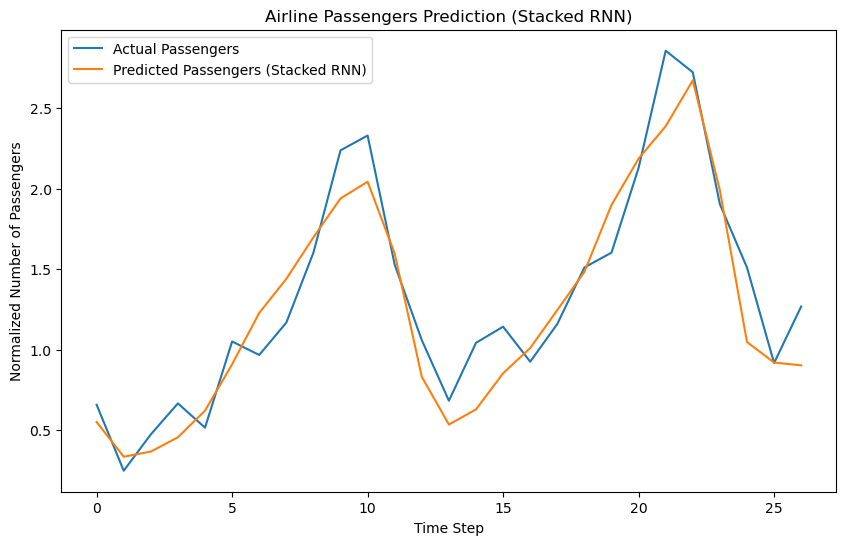

In [8]:
from tensorflow.keras.layers import SimpleRNN, Dense

# Build the stacked RNN model
stacked_rnn_model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    SimpleRNN(50, activation='relu'),
    Dense(1)
])

# Compile the model
stacked_rnn_model.compile(optimizer='adam', loss='mse')

# Display the model summary
stacked_rnn_model.summary()

# Train the stacked RNN model
history_stacked = stacked_rnn_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Evaluate the stacked RNN model on the validation set
val_loss_stacked = stacked_rnn_model.evaluate(x_val, y_val)
print(f"Validation Loss (Stacked RNN): {val_loss_stacked}")

# Predict using the stacked RNN model
predictions_stacked = stacked_rnn_model.predict(x_val)

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='Actual Passengers')
plt.plot(predictions_stacked, label='Predicted Passengers (Stacked RNN)')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Normalized Number of Passengers')
plt.title('Airline Passengers Prediction (Stacked RNN)')
plt.show()


# Bi-Directional RNN Implementation

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 100)               5200      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 1s 83ms/step - loss: 0.5039 - val_loss: 0.6750
Epoch 2/10
4/4 [==============================] - 0s 10ms/step - loss: 0.2366 - val_loss: 0.3593
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 0.1152 - val_loss: 0.2687
Epoch 4/10
4/4 [==============================] - 0s 10ms/s

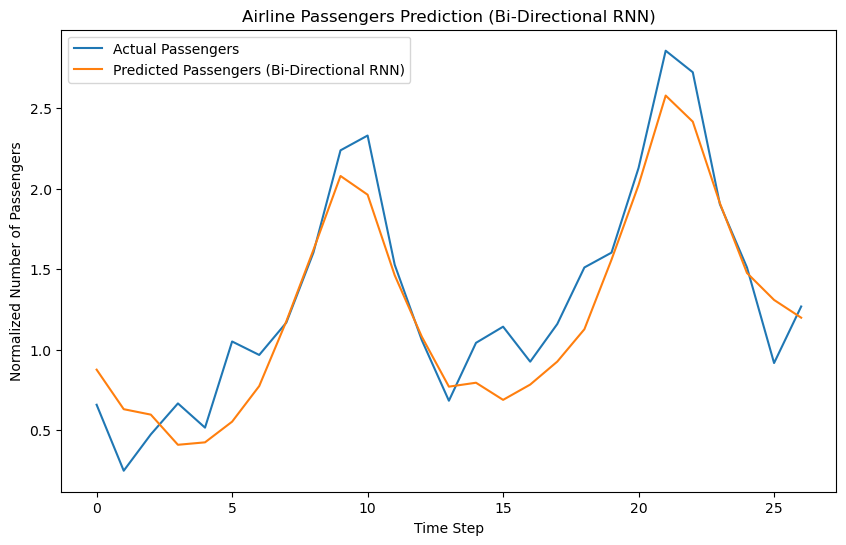

In [11]:
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense

# Build the bi-directional RNN model
bi_rnn_model = Sequential([
    Bidirectional(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1))),
    Dense(1)
])

# Manually build the model
bi_rnn_model.build(input_shape=(None, sequence_length, 1))

# Compile the model
bi_rnn_model.compile(optimizer='adam', loss='mse')

# Display the model summary
bi_rnn_model.summary()

# Train the bi-directional RNN model
history_bi = bi_rnn_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Generate predictions
predictions_bi = bi_rnn_model.predict(x_val)

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='Actual Passengers')
plt.plot(predictions_bi, label='Predicted Passengers (Bi-Directional RNN)')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Normalized Number of Passengers')
plt.title('Airline Passengers Prediction (Bi-Directional RNN)')
plt.show()


# Exploring Hybrid Architectures


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 32)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense_5 (Dense)             (None, 50)                8050      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8229 (32.14 KB)
Trainable params: 8229 (32.14 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

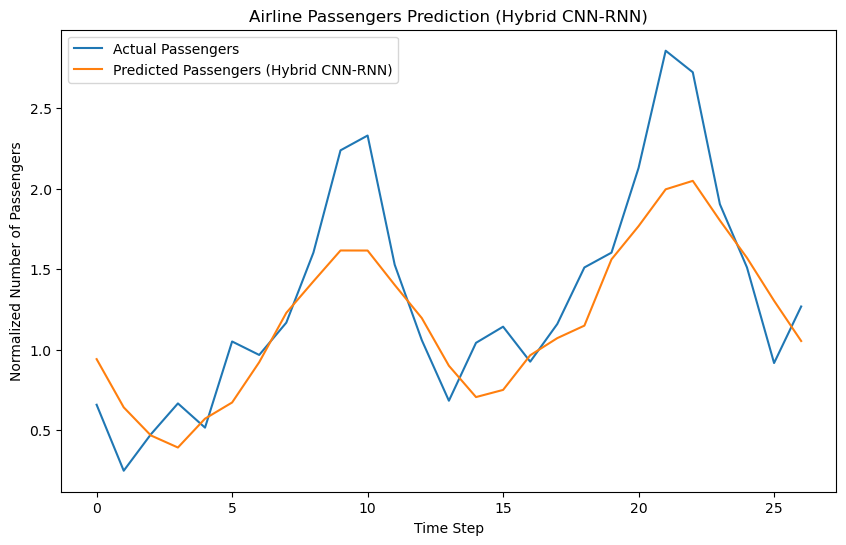

In [12]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

# Build the hybrid CNN-RNN model
hybrid_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

# Manually build the model
hybrid_model.build(input_shape=(None, sequence_length, 1))

# Compile the model
hybrid_model.compile(optimizer='adam', loss='mse')

# Display the model summary
hybrid_model.summary()

# Train the hybrid CNN-RNN model
history_hybrid = hybrid_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Generate predictions using the hybrid model
predictions_hybrid = hybrid_model.predict(x_val)

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='Actual Passengers')
plt.plot(predictions_hybrid, label='Predicted Passengers (Hybrid CNN-RNN)')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Normalized Number of Passengers')
plt.title('Airline Passengers Prediction (Hybrid CNN-RNN)')
plt.show()
